In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [12]:
df = pd.read_csv("student_data.csv")
X = df[["Hours_Studied", "Review_Session"]]
y = df["Results"]

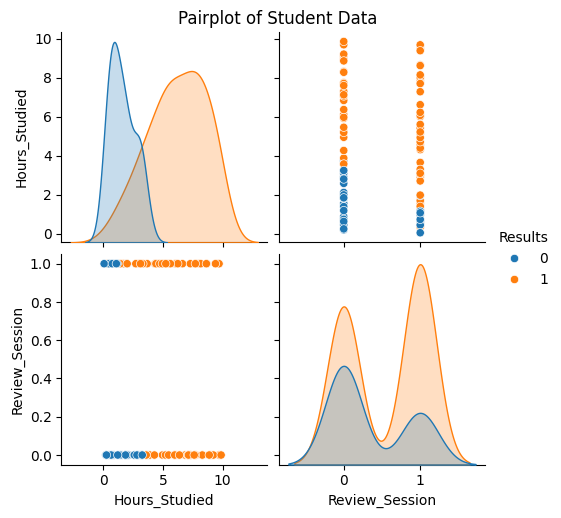

In [13]:
sns.pairplot(df, hue=df.columns[-1])
plt.suptitle('Pairplot of Student Data', y=1.02)
plt.show()

In [14]:
model = LogisticRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-4.61373892]
Coefficients: [[1.36542016 1.87797591]]


In [15]:
y_pred_prob = model.predict_proba(X)[:, 1]
y_pred = model.predict(X)

In [16]:
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_prob)

print("Accuracy:", accuracy)
print("AUC:", auc)

Accuracy: 0.93
AUC: 0.9761029411764706


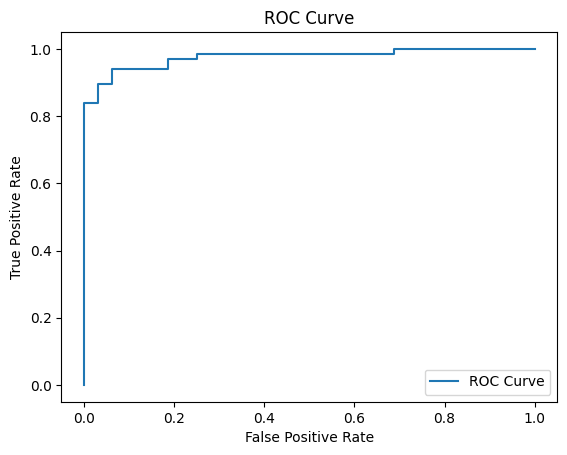

In [17]:
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()